In [1]:
MODEL_FLAGS="--image_size 256 --num_channels 128 --class_cond False --num_res_blocks 2 --num_heads 1 --learn_sigma True --use_scale_shift_norm False --attention_resolutions 16"
DIFFUSION_FLAGS="--diffusion_steps 1000 --noise_schedule linear --rescale_learned_sigmas False --rescale_timesteps False"
TRAIN_FLAGS="--lr 1e-4"

In [6]:
!python scripts/segmentation_train.py --data_dir ./data/training $TRAIN_FLAGS $MODEL_FLAGS $DIFFUSION_FLAGS

usage: segmentation_train.py [-h] [--data_dir DATA_DIR]
                             [--schedule_sampler SCHEDULE_SAMPLER] [--lr LR]
                             [--weight_decay WEIGHT_DECAY]
                             [--lr_anneal_steps LR_ANNEAL_STEPS]
                             [--batch_size BATCH_SIZE]
                             [--microbatch MICROBATCH] [--ema_rate EMA_RATE]
                             [--log_interval LOG_INTERVAL]
                             [--save_interval SAVE_INTERVAL]
                             [--resume_checkpoint RESUME_CHECKPOINT]
                             [--use_fp16 USE_FP16]
                             [--fp16_scale_growth FP16_SCALE_GROWTH]
                             [--image_size IMAGE_SIZE]
                             [--num_channels NUM_CHANNELS]
                             [--num_res_blocks NUM_RES_BLOCKS]
                             [--num_heads NUM_HEADS]
                             [--num_heads_upsample NUM_HEADS_UPSAMPLE]
 

In [ ]:
!python scripts/segmentation_sample.py  --data_dir ./data/testing  --model_path ./result/savedmodel000150.pt --num_ensemble=5 $MODEL_FLAGS $DIFFUSION_FLAGS

In [7]:
import numpy as np
import matplotlib.pyplot as plt

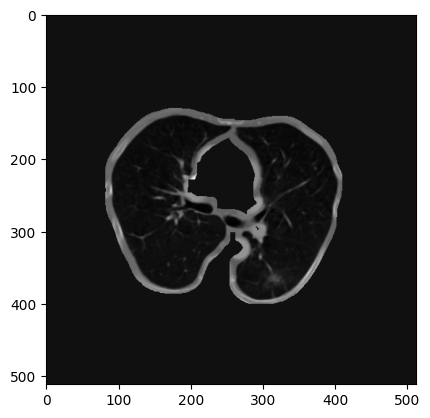

In [8]:
img_array = np.load("./../data/Image/0001_NI000_slice000.npy")
plt.imshow(img_array, cmap='gray')
# plt.axis('off')
plt.show()

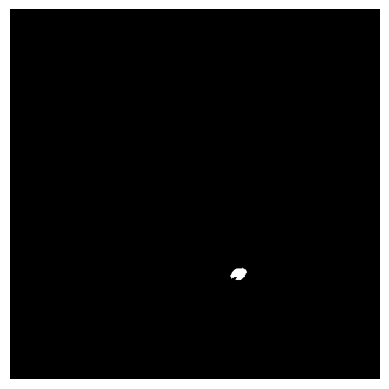

In [9]:
img_array2 = np.load("./../data/Mask/0001_MA000_slice000.npy")
tmp = img_array2.astype(int)
plt.imshow(tmp, cmap='gray')
plt.axis('off')
plt.show()

In [10]:
tmp

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
from PIL import Image

scaled_array = (tmp * 255).astype(np.uint8)
image = Image.fromarray(scaled_array)
width, height = image.size

left = width * 0.125
top = height * 0.125
right = width * 0.875
bottom = height * 0.875

cropped_image = image.crop((left, top, right, bottom))
resized_image = cropped_image.resize((512, 512))

resized_image.save("new.png")
resized_image.show()

In [12]:
array = img_array

normalized_array = ((array - np.min(array)) / (np.max(array) - np.min(array)) * 255).astype(np.uint8)
grayscale_image = Image.fromarray(normalized_array, mode='L')

width, height = grayscale_image.size

left = width * 0.125
top = height * 0.125
right = width * 0.875
bottom = height * 0.875

cropped_image = grayscale_image.crop((left, top, right, bottom))
resized_image = cropped_image.resize((512, 512))
# Save the grayscale image
resized_image.save('grayscale_output2.png')


In [13]:
import os
import numpy as np
from PIL import Image

# Specify the input and output directories
input_directory = './../data/Mask/'
output_directory = './../data/Modified_Mask/'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all the .npy files in the input directory
npy_files = [f for f in os.listdir(input_directory) if f.endswith('.npy')]

# Iterate through the .npy files and save them as .png files
for npy_file in npy_files:
    # Load the numpy array
    numpy_array = np.load(os.path.join(input_directory, npy_file))

    # Convert the numpy array to a PIL image
    image = Image.fromarray((numpy_array * 255).astype('uint8'))

    width, height = image.size

    left = width * 0.125
    top = height * 0.125
    right = width * 0.875
    bottom = height * 0.875

    image = image.crop((left, top, right, bottom))
    image = image.resize((512, 512))

    # Save the image as a .png file with the same filename
    image.save(os.path.join(output_directory, os.path.splitext(npy_file)[0] + '.png'))

    # Close the image to free up resources
    image.close()

In [ ]:
# Specify the input and output directories
input_directory = './../data/Image/'
output_directory = './../data/Modified_Image/'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all the .npy files in the input directory
npy_files = [f for f in os.listdir(input_directory) if f.endswith('.npy')]

# Iterate through the .npy files and save them as .png files
for npy_file in npy_files:
    # Load the numpy array
    numpy_array = np.load(os.path.join(input_directory, npy_file))

    # Convert the numpy array to a PIL image
    image = Image.fromarray(((numpy_array - np.min(numpy_array)) / (np.max(numpy_array) - np.min(numpy_array)) * 255).astype(np.uint8))

    width, height = image.size

    left = width * 0.125
    top = height * 0.125
    right = width * 0.875
    bottom = height * 0.875

    image = image.crop((left, top, right, bottom))
    image = image.resize((512, 512))

    # Save the image as a .png file with the same filename
    image.save(os.path.join(output_directory, os.path.splitext(npy_file)[0] + '.png'))

    # Close the image to free up resources
    image.close()

In [ ]:
import torch
from PIL import Image
import numpy as np

# Load a tensor from a file (e.g., in .pt or .npy format)
loaded_tensor = torch.load('./output/0002_NI000_slice001_output4').cpu()

# Convert the tensor to a NumPy array
tensor_as_array = loaded_tensor.numpy().squeeze()

# Normalize the array values to the range [0, 255] for image display
normalized_array = (tensor_as_array - tensor_as_array.min()) / (tensor_as_array.max() - tensor_as_array.min()) * 255

# Convert the NumPy array to an unsigned 8-bit integer type
uint8_array = normalized_array.astype(np.uint8)

# Create an image from the NumPy array
image = Image.fromarray(uint8_array)

# Save the image to a file (e.g., in .png format)
# image.save('output_image.png')

# Display the image
image.show()